# Business Problem



As a marketing agency, our primary objective is to maximize the return on investment (ROI) for our clients advertising campaigns. We have conducted two ad campaigns, one on Facebook and the other on AdWords, and we need to determine which platform yields better results in terms of clicks, conversions, and overall cost-effectiveness. By identifying the most effective platform, we can allocate our resources more efficiently and optimize our advertising strategies to deliver better outcomes for our clients.

### Research Question

Which ad platform is more effective in terms of conversions, clicks, and overall cost-effectiveness?







## Data Description

The dataset comprises a collection of data comparing the performance of two separate ad campaigns conducted throughout the year 2019. Specifically, the data covers a Facebook Ad campaign and an AdWords Ad campaign. For each day of the year 2019, there is a corresponding row in the dataset, resulting in a total of 365 lines of campaign data to analyze. The dataset includes various performance metrics for each ad campaign, providing insights into their effectiveness and efficiency over time.

**Key features included in the dataset are as follows:**

- **Date:** The date corresponding to each row of campaign data, ranging from January 1st, 2019, to December 31st, 2019.
- **Ad Views:** The number of times the ad was viewed.
- **Ad Clicks:** The number of clicks received on the ad.
- **Ad Conversions:** The number of conversions resulting from the ad.
- **Cost per Ad:** The cost associated with running the Facebook ad campaign.
- **Click-Through Rate (CTR):** The ratio of clicks to views, indicating the effectiveness of the ad in generating clicks.
- **Conversion Rate:** The ratio of conversions to clicks, reflecting the effectiveness of the ad in driving desired actions.
- **Cost per Click (CPC):** The average cost incurred per click on the ad.



In [22]:
#IMPORTING LIBRARIES

import warnings
warnings.filterwarnings("ignore")   # hide non-critical warnings during notebook runs

import pandas as pd                 # data manipulation
import numpy as np                  # numerical ops
import matplotlib.pyplot as plt     # plotting
import seaborn as sns               # nicer statistical plots

from scipy import stats             # t-test, correlation, etc.
import statsmodels.api as sm        # OLS + prediction intervals

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error





In [2]:
df = pd.read_csv(r"C:\Users\sujal\Downloads\ABmarketing_campaign.csv")
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,1/1/2019,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30
1,1/2/2019,FB_Jan19,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05
2,1/3/2019,FB_Jan19,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23
3,1/4/2019,FB_Jan19,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan19,3911,49,5,$141,1.26%,11.08%,$2.86
4,1/5/2019,FB_Jan19,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan19,4070,55,7,$133,1.36%,12.22%,$2.40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 17 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Date                                             365 non-null    object
 1   Facebook Ad Campaign                             365 non-null    object
 2   Facebook Ad Views                                365 non-null    int64 
 3   Facebook Ad Clicks                               365 non-null    int64 
 4   Facebook Ad Conversions                          365 non-null    int64 
 5   Cost per Facebook Ad                             365 non-null    object
 6   Facebook Click-Through Rate (Clicks / View)      365 non-null    object
 7   Facebook Conversion Rate (Conversions / Clicks)  365 non-null    object
 8   Facebook Cost per Click (Ad Cost / Clicks)       365 non-null    object
 9   AdWords Ad Campaign                        

In [4]:
#fixing data types
df['Date'] = pd.to_datetime(df['Date'])
exclude_col = ["Facebook Ad Campaign","AdWords Ad Campaign"]
for col in df.columns:
    if df[col].dtypes=='object' and col not in exclude_col:
        df[col]=df[col].replace(r'[$,%]','',regex=True)
        df[col]=pd.to_numeric(df[col],errors='ignore')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 17 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Date                                             365 non-null    datetime64[ns]
 1   Facebook Ad Campaign                             365 non-null    object        
 2   Facebook Ad Views                                365 non-null    int64         
 3   Facebook Ad Clicks                               365 non-null    int64         
 4   Facebook Ad Conversions                          365 non-null    int64         
 5   Cost per Facebook Ad                             365 non-null    int64         
 6   Facebook Click-Through Rate (Clicks / View)      365 non-null    float64       
 7   Facebook Conversion Rate (Conversions / Clicks)  365 non-null    float64       
 8   Facebook Cost per Click (Ad Cost / Click

In [6]:
df.describe()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
count,365,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2019-07-02 00:00:00,2179.687671,44.049315,11.742466,87.780822,2.201288,27.153288,2.187808,4717.19726,60.383562,5.980822,134.975342,1.295781,10.184356,2.377863
min,2019-01-01 00:00:00,1050.000000,15.000000,5.000000,34.000000,0.830000,21.480000,0.610000,3714.00000,31.000000,3.000000,73.000000,0.570000,6.130000,0.850000
25%,2019-04-02 00:00:00,1656.000000,35.000000,10.000000,63.000000,1.490000,23.800000,1.410000,4247.00000,49.000000,5.000000,110.000000,1.030000,7.700000,1.760000
50%,2019-07-02 00:00:00,2202.000000,43.000000,12.000000,88.000000,2.000000,26.770000,2.020000,4711.00000,60.000000,6.000000,135.000000,1.290000,9.930000,2.290000
75%,2019-10-01 00:00:00,2717.000000,54.000000,13.000000,111.000000,2.670000,28.970000,2.760000,5190.00000,73.000000,7.000000,162.000000,1.520000,12.030000,2.810000
max,2019-12-31 00:00:00,3320.000000,73.000000,19.000000,144.000000,5.370000,47.590000,7.140000,5760.00000,89.000000,9.000000,197.000000,2.250000,20.060000,5.650000
std,NaN,618.074639,12.140559,2.924786,28.263014,0.933193,4.165921,1.040820,561.11406,14.368225,1.628106,32.338304,0.338782,2.887445,0.856929


- On average, Facebook generated twice the number of conversions at two-thirds the cost compared to AdWords, despite having half the reach. This suggests Facebook offers stronger ROI, while AdWords may be better for brand awareness campaigns.

In [7]:
df.isnull().sum() 

Date                                               0
Facebook Ad Campaign                               0
Facebook Ad Views                                  0
Facebook Ad Clicks                                 0
Facebook Ad Conversions                            0
Cost per Facebook Ad                               0
Facebook Click-Through Rate (Clicks / View)        0
Facebook Conversion Rate (Conversions / Clicks)    0
Facebook Cost per Click (Ad Cost / Clicks)         0
AdWords Ad Campaign                                0
AdWords Ad Views                                   0
AdWords Ad Clicks                                  0
AdWords Ad Conversions                             0
Cost per AdWords Ad                                0
AdWords Click-Through Rate (Clicks / View)         0
AdWords Conversion Rate (Conversions / Click)      0
AdWords Cost per Click (Ad Cost / Clicks)          0
dtype: int64

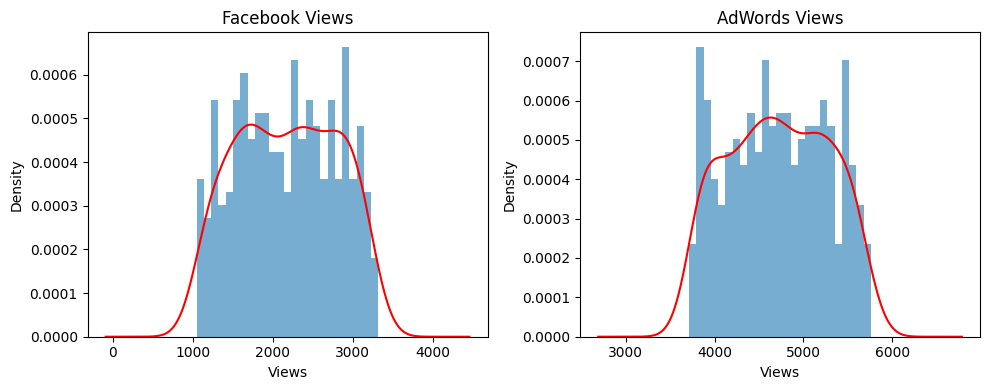

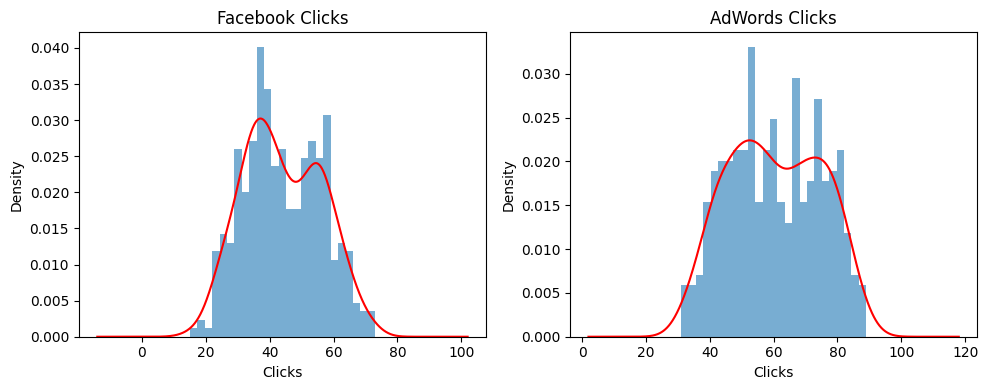

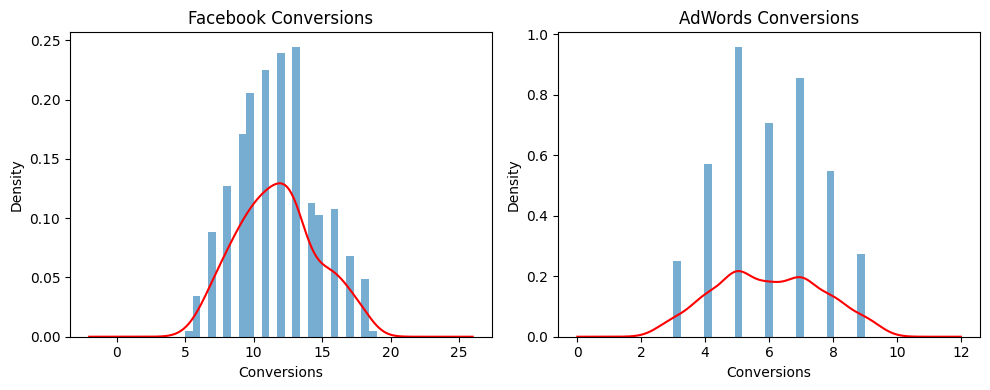

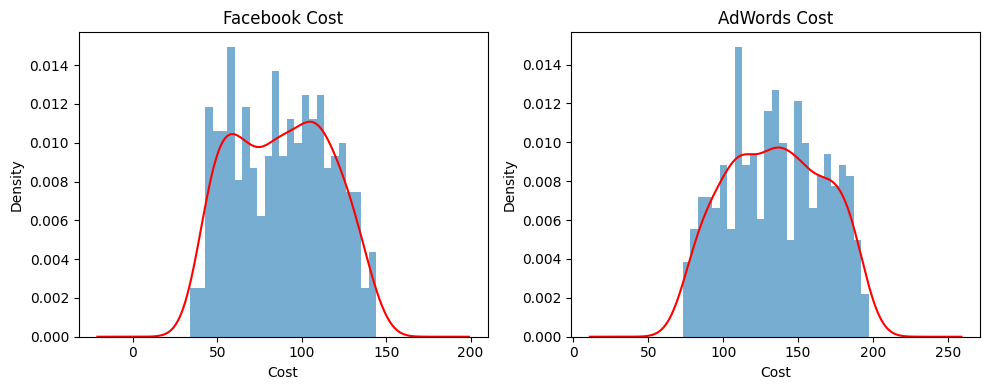

In [8]:
raw_metrics = {
    'Views': ['Facebook Ad Views', 'AdWords Ad Views'],
    'Clicks': ['Facebook Ad Clicks', 'AdWords Ad Clicks'],
    'Conversions': ['Facebook Ad Conversions', 'AdWords Ad Conversions'],
    'Cost': ['Cost per Facebook Ad', 'Cost per AdWords Ad']
}

for title, cols in raw_metrics.items():
    plt.figure(figsize=(10,4))
    
    # Facebook
    plt.subplot(1,2,1)
    df[cols[0]].plot(kind='hist', bins=25, alpha=0.6, density=True)
    df[cols[0]].plot(kind='kde', color='red')
    plt.title(f"Facebook {title}")
    plt.xlabel(title)
    
    # AdWords
    plt.subplot(1,2,2)
    df[cols[1]].plot(kind='hist', bins=25, alpha=0.6, density=True)
    df[cols[1]].plot(kind='kde', color='red')
    plt.title(f"AdWords {title}")
    plt.xlabel(title)
    
    plt.tight_layout()
    plt.show()




📄 **Distribution Summary**
When we looked at the daily distributions:

* **Views**: Google ads were shown to a wider audience each day (around 4,000–6,000 views) compared to Facebook (around 1,000–3,500 views). Both platforms had fairly even spreads with no extreme spikes.
* **Clicks**: Google generally got more clicks, but with more variation. Facebook had fewer clicks, but the daily numbers were steadier.
* **Conversions**: Facebook’s daily conversions formed a neat, consistent pattern around 10–15 per day. Google’s conversions were lower and more tightly clustered around 5–7 per day.
* **Costs**: Daily spending on Google was higher and more spread out, while Facebook costs were lower and more concentrated.

👉 **Takeaway:** The distributions show that Google has more reach and activity overall, but Facebook’s conversions and costs are more stable and predictable. This stability can make Facebook a safer choice for consistent performance, while Google may be better suited for campaigns aimed at visibility and reach.



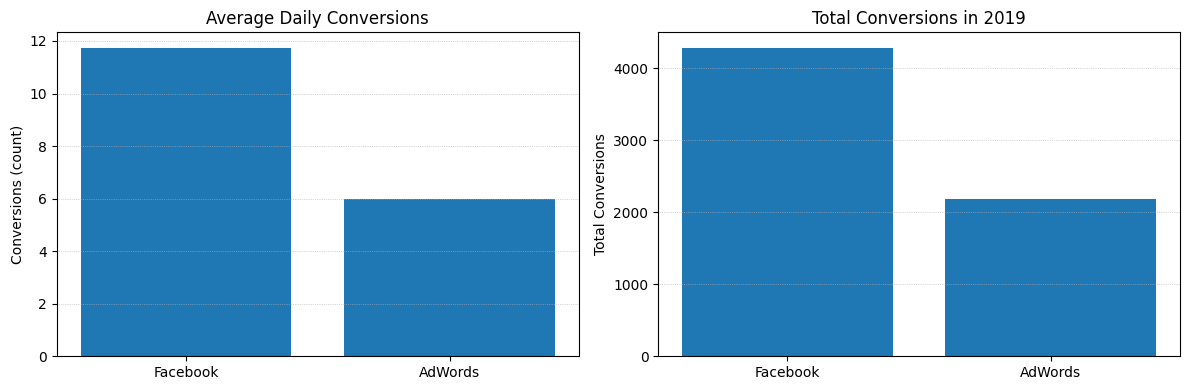

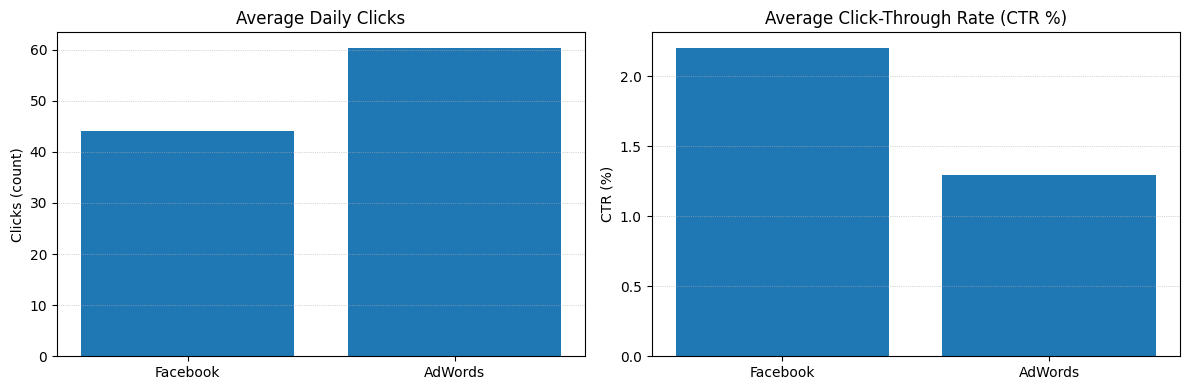

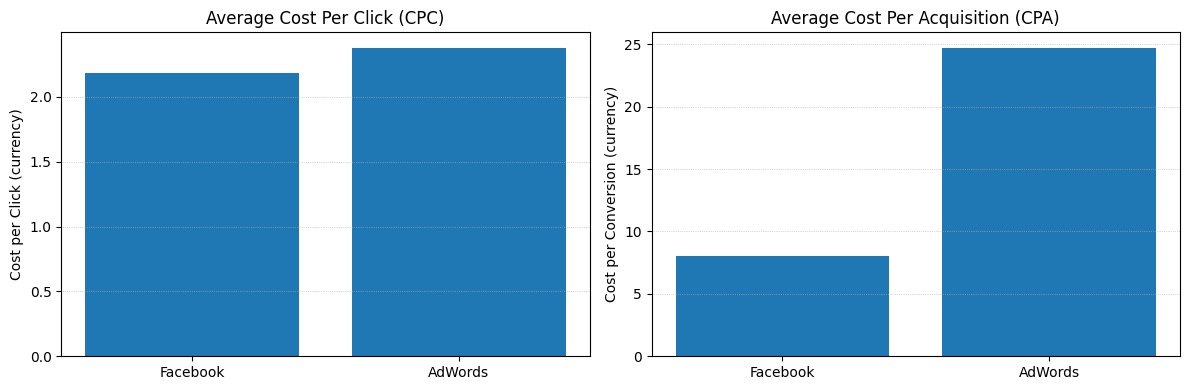

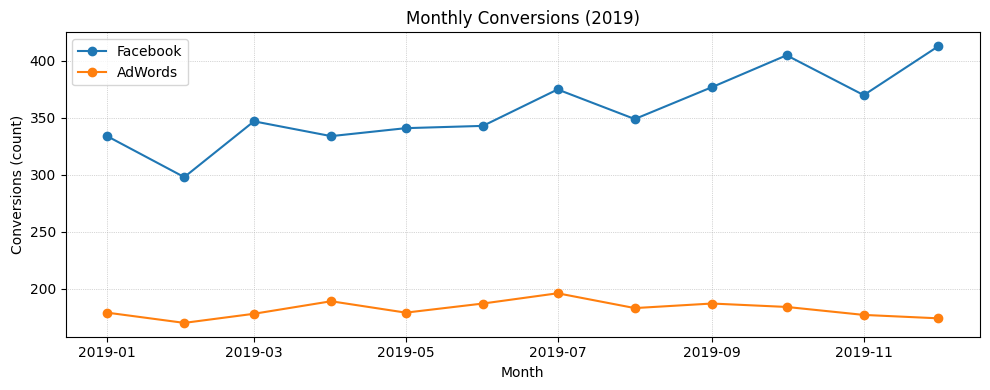

               Metric  Facebook  AdWords
Avg daily conversions     11.74     5.98
          Avg CTR (%)      2.20     1.30
              Avg CPC      2.19     2.38
              Avg CPA      8.07    24.71
    Total conversions   4286.00  2183.00


In [9]:
# --- Column names (full descriptive names) ---
facebook_views_col = "Facebook Ad Views"
facebook_clicks_col = "Facebook Ad Clicks"
facebook_conversions_col = "Facebook Ad Conversions"
facebook_cost_col = "Cost per Facebook Ad"

adwords_views_col = "AdWords Ad Views"
adwords_clicks_col = "AdWords Ad Clicks"
adwords_conversions_col = "AdWords Ad Conversions"
adwords_cost_col = "Cost per AdWords Ad"

# --- safer division function to avoid divide-by-zero ---
def safe_div(numerator, denominator):
    """
    Return numerator/denominator, but treat 0 denominators as NA (so result becomes NaN).
    Works with pandas Series.
    """
    denom_nonzero = denominator.replace({0: pd.NA})
    return numerator.astype(float) / denom_nonzero.astype(float)

# --- Compute full-name metrics and add them to df ---
df['Facebook Click-Through Rate (%)'] = safe_div(df[facebook_clicks_col], df[facebook_views_col]) * 100
df['Facebook Conversion Rate (%)'] = safe_div(df[facebook_conversions_col], df[facebook_clicks_col]) * 100
df['Facebook Cost per Click'] = safe_div(df[facebook_cost_col], df[facebook_clicks_col])
df['Facebook Cost per Acquisition'] = safe_div(df[facebook_cost_col], df[facebook_conversions_col])

df['AdWords Click-Through Rate (%)'] = safe_div(df[adwords_clicks_col], df[adwords_views_col]) * 100
df['AdWords Conversion Rate (%)'] = safe_div(df[adwords_conversions_col], df[adwords_clicks_col]) * 100
df['AdWords Cost per Click'] = safe_div(df[adwords_cost_col], df[adwords_clicks_col])
df['AdWords Cost per Acquisition'] = safe_div(df[adwords_cost_col], df[adwords_conversions_col])

# --- 2. Summary numbers (mean and totals) using full names ---
summary = {
    'mean_facebook_conversions': df[facebook_conversions_col].mean(),
    'mean_adwords_conversions': df[adwords_conversions_col].mean(),
    'mean_facebook_conversion_rate': df['Facebook Conversion Rate (%)'].mean(),
    'mean_adwords_conversion_rate': df['AdWords Conversion Rate (%)'].mean(),
    'mean_facebook_clicks': df[facebook_clicks_col].mean(),
    'mean_adwords_clicks': df[adwords_clicks_col].mean(),
    'mean_facebook_ctr': df['Facebook Click-Through Rate (%)'].mean(),
    'mean_adwords_ctr': df['AdWords Click-Through Rate (%)'].mean(),
    'mean_facebook_cpc': df['Facebook Cost per Click'].mean(),
    'mean_adwords_cpc': df['AdWords Cost per Click'].mean(),
    'mean_facebook_cpa': df['Facebook Cost per Acquisition'].mean(),
    'mean_adwords_cpa': df['AdWords Cost per Acquisition'].mean(),
    'total_facebook_conversions': df[facebook_conversions_col].sum(),
    'total_adwords_conversions': df[adwords_conversions_col].sum()
}

# --- 3. Plot 1: Avg daily conversions (counts) and total yearly conversions ---
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

platforms = ['Facebook', 'AdWords']
avg_conversions = [summary['mean_facebook_conversions'], summary['mean_adwords_conversions']]
ax[0].bar(platforms, avg_conversions)
ax[0].set_title('Average Daily Conversions')
ax[0].set_ylabel('Conversions (count)')
ax[0].grid(axis='y', linestyle=':', linewidth=0.5)

totals = [summary['total_facebook_conversions'], summary['total_adwords_conversions']]
ax[1].bar(platforms, totals)
ax[1].set_title('Total Conversions in 2019')
ax[1].set_ylabel('Total Conversions')
ax[1].grid(axis='y', linestyle=':', linewidth=0.5)

plt.tight_layout()
plt.show()

# --- 4. Plot 2: Clicks and CTR side-by-side (grouped bars) ---
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

mean_clicks = [summary['mean_facebook_clicks'], summary['mean_adwords_clicks']]
ax[0].bar(platforms, mean_clicks)
ax[0].set_title('Average Daily Clicks')
ax[0].set_ylabel('Clicks (count)')
ax[0].grid(axis='y', linestyle=':', linewidth=0.5)

mean_ctrs = [summary['mean_facebook_ctr'], summary['mean_adwords_ctr']]
ax[1].bar(platforms, mean_ctrs)
ax[1].set_title('Average Click-Through Rate (CTR %)')
ax[1].set_ylabel('CTR (%)')
ax[1].grid(axis='y', linestyle=':', linewidth=0.5)

plt.tight_layout()
plt.show()

# --- 5. Plot 3: Cost effectiveness (CPC and CPA) ---
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

mean_cpcs = [summary['mean_facebook_cpc'], summary['mean_adwords_cpc']]
ax[0].bar(platforms, mean_cpcs)
ax[0].set_title('Average Cost Per Click (CPC)')
ax[0].set_ylabel('Cost per Click (currency)')
ax[0].grid(axis='y', linestyle=':', linewidth=0.5)

mean_cpas = [summary['mean_facebook_cpa'], summary['mean_adwords_cpa']]
ax[1].bar(platforms, mean_cpas)
ax[1].set_title('Average Cost Per Acquisition (CPA)')
ax[1].set_ylabel('Cost per Conversion (currency)')
ax[1].grid(axis='y', linestyle=':', linewidth=0.5)

plt.tight_layout()
plt.show()

# --- 6. Plot 4: Monthly trends for conversions (line chart) ---
df['Month'] = df['Date'].dt.to_period('M')
monthly = df.groupby('Month').agg({
    facebook_conversions_col: 'sum',
    adwords_conversions_col: 'sum'
}).reset_index()

monthly['Month_dt'] = monthly['Month'].dt.to_timestamp()

plt.figure(figsize=(10,4))
plt.plot(monthly['Month_dt'], monthly[facebook_conversions_col], marker='o', label='Facebook')
plt.plot(monthly['Month_dt'], monthly[adwords_conversions_col], marker='o', label='AdWords')
plt.title('Monthly Conversions (2019)')
plt.xlabel('Month')
plt.ylabel('Conversions (count)')
plt.legend()
plt.grid(linestyle=':', linewidth=0.5)
plt.tight_layout()
plt.show()

# --- 7. Small table summary printout for report ---
report_df = pd.DataFrame({
    'Metric': ['Avg daily conversions', 'Avg CTR (%)', 'Avg CPC', 'Avg CPA', 'Total conversions'],
    'Facebook': [round(summary['mean_facebook_conversions'],2), round(summary['mean_facebook_ctr'],2),
                 round(summary['mean_facebook_cpc'],2), round(summary['mean_facebook_cpa'],2), int(summary['total_facebook_conversions'])],
    'AdWords': [round(summary['mean_adwords_conversions'],2), round(summary['mean_adwords_ctr'],2),
                round(summary['mean_adwords_cpc'],2), round(summary['mean_adwords_cpa'],2), int(summary['total_adwords_conversions'])]
})
print(report_df.to_string(index=False))


- Facebook is the clear winner for conversions and cost-effectiveness.

- AdWords, despite larger reach (more impressions and clicks), has lower conversion efficiency and a much higher cost per acquisition.

- AdWords may still be valuable for brand awareness campaigns (bigger audience reach), but for ROI-driven marketing, Facebook is the stronger choice.

## How frequently do we observe days with high numbers of conversions compared to days with low numbers of conversions?

In [10]:
def conversion_col(df,conv_col,out_col=None,q_low=0.25,q_high=0.75,keep=True):
    if out_col is None: # auto generate name
        out_col = conv_col+"_category"
        
        #calculate quartiles
    q1= df[conv_col].quantile(q_low)
    q3= df[conv_col].quantile(q_high)
    
    #define bins
    bins= [-np.inf,q1,q3,np.inf]
    labels=['Low','Medium','High']

    #categorize
    cat_series= pd.cut(df[conv_col], bins=bins,labels=labels)

    #add to datafram
    if keep:
        df[out_col]=cat_series
        return df
    else:
        return cat_series
df = conversion_col(df, "Facebook Ad Conversions", out_col="FB_Conversion_Category")
df = conversion_col(df, "AdWords Ad Conversions", out_col="AW_Conversion_Category")
print(df['FB_Conversion_Category'].value_counts(normalize=True) * 100) #gives proportions
print ("-"*100)
print(df['AW_Conversion_Category'].value_counts(normalize=True) * 100)



FB_Conversion_Category
Medium    39.726027
Low       35.342466
High      24.931507
Name: proportion, dtype: float64
----------------------------------------------------------------------------------------------------
AW_Conversion_Category
Low       42.739726
Medium    37.534247
High      19.726027
Name: proportion, dtype: float64




Facebook has more high-conversion days (25%) compared to AdWords (20%).

AdWords suffers from more low-conversion days (43%) than Facebook (35%).

Both platforms see most of their days in the medium range (~38–40%).

Overall, Facebook shows steadier and stronger daily performance, while AdWords is more likely to underperform.

## do more clicks on the ads really leads to more sales?


In [12]:
#finding correlation for facebook
x= "Facebook Ad Clicks"
y= "Facebook Ad Conversions"
fb_corr= df[x].corr(df[y])
print(f'Correlaton between{x} and {y}: {fb_corr:.2f}')


Correlaton betweenFacebook Ad Clicks and Facebook Ad Conversions: 0.87


In [14]:
#for adwords
x= "AdWords Ad Clicks"
y="AdWords Ad Conversions"
adword_corr=df[x].corr(df[y])
print(f"Correlation between {x} and {y}: {adword_corr:.2f}")

Correlation between AdWords Ad Clicks and AdWords Ad Conversions: 0.45


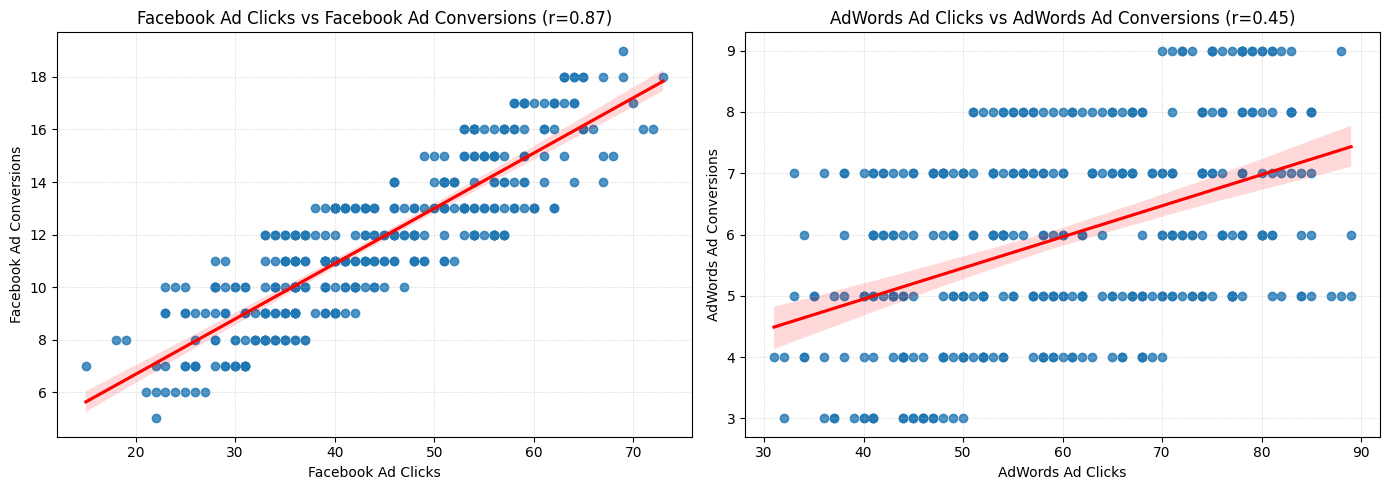

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Facebook scatter + regression
sns.regplot(
    data=df, 
    x="Facebook Ad Clicks", 
    y="Facebook Ad Conversions", 
    ax=axes[0], 
    line_kws={'color':'red'}
)
axes[0].set_title(f"Facebook Ad Clicks vs Facebook Ad Conversions (r={fb_corr:.2f})")
axes[0].set_xlabel("Facebook Ad Clicks")
axes[0].set_ylabel("Facebook Ad Conversions")
axes[0].grid(linestyle=':', linewidth=0.4)

# AdWords scatter + regression
sns.regplot(
    data=df, 
    x="AdWords Ad Clicks", 
    y="AdWords Ad Conversions", 
    ax=axes[1], 
    line_kws={'color':'red'}
)
axes[1].set_title(f"AdWords Ad Clicks vs AdWords Ad Conversions (r={adword_corr:.2f})")
axes[1].set_xlabel("AdWords Ad Clicks")
axes[1].set_ylabel("AdWords Ad Conversions")
axes[1].grid(linestyle=':', linewidth=0.4)

plt.tight_layout()
plt.show()


- Facebook: Strong positive relationship between clicks and conversions (r ≈ 0.87). This means days with more Facebook clicks tend to have substantially more conversions — clicks are a good predictor of conversions for Facebook in this dataset.

- AdWords: Moderate positive relationship (r ≈ 0.45). Clicks and conversions are correlated, but the relationship is weaker and noisier than Facebook. Many AdWords days have clicks that do not translate into proportionally higher conversions.

- Practical takeaway: More clicks generally lead to more conversions, but the strength differs by platform. Facebook clicks are more “valuable” (higher conversion per click). For AdWords, additional analysis (creative, targeting, landing page quality) may be needed to convert clicks into sales more reliably.

## **Hypothesis Testing**

**Hypothesis:** Running ads on Facebook will lead to more conversions than running ads on Google AdWords.

**Null Hypothesis (H0):** There’s no difference in the number of conversions between Facebook and AdWords, or AdWords has equal or more conversions than Facebook.
- H0: Conversions on Facebook are less than or equal to conversions on AdWords

**Alternative Hypothesis (H1):** Conversions from Facebook are higher than those from AdWords.
- H1: Conversions on Facebook are greater than conversions on AdWords



In [16]:
facebook_conversions = df["Facebook Ad Conversions"]
adwords_conversions = df["AdWords Ad Conversions"]

# Welch’s t-test (gives t-stat and two-tailed p-value internally)
t_stat, p_val = stats.ttest_ind(facebook_conversions, adwords_conversions, equal_var=False)

# Convert directly to one-tailed (since H1: Facebook > AdWords)
p_val = p_val / 2 if t_stat > 0 else 1.0

print(f"T-statistic: {t_stat:.4f}")
print(f"One-tailed p-value: {p_val:.6e}")

if p_val < 0.05:
    print("Reject H0 → Facebook conversions are significantly higher.")
else:
    print("Fail to reject H0 → No significant evidence that Facebook > AdWords.")


T-statistic: 32.8840
One-tailed p-value: 4.674459e-134
Reject H0 → Facebook conversions are significantly higher.


We applied a one-tailed independent t-test because our alternative hypothesis was directional (Facebook > AdWords).

- The t-test shows a highly significant difference in conversions between the two platforms (t = 32.88, p < 0.001).

- This confirms that Facebook Ads achieve more conversions than AdWords, not just by chance but in a statistically reliable way.

- For decision-making: Businesses can expect better conversion outcomes from Facebook campaigns compared to AdWords under similar conditions.

## Regression Analysis

### What will happen when I do go with the Facebook Ad? How many facebook ad conversions can I expect given a certain number of facebook ad clicks?

In [19]:
X = df[["Facebook Ad Clicks"]]   
y = df["Facebook Ad Conversions"]

# Split into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


# Initialize model
model = LinearRegression()

# Fit on training data
model.fit(X_train, y_train)

# Coefficients
intercept = model.intercept_
slope = model.coef_[0]

print(f"Regression equation: Conversions = {intercept:.2f} + {slope:.2f} * Clicks")

# Predictions on test set
y_pred = model.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² on test set: {r2:.3f}")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")





Training samples: 255
Testing samples: 110
Regression equation: Conversions = 2.32 + 0.21 * Clicks
R² on test set: 0.775
MAE: 1.219
RMSE: 1.414


We built a simple linear regression model to predict Facebook Ad Conversions from Facebook Ad Clicks. The model achieved an R² of 0.78, meaning clicks explain about 78% of the variation in conversions. On average, predictions were off by only 1–1.5 conversions, which is a strong result for marketing data.

The regression equation indicates that for every 10 additional clicks, we can expect roughly 2 extra conversions. This makes the model useful for forecasting conversions under different campaign scenarios.

While the current model is strong, further improvements could be made by including more predictors (e.g., cost per ad, impressions, or platform type) and testing non-linear relationships (such as diminishing returns at higher click volumes).

In [20]:

# Define X and y
X = df[["Facebook Ad Clicks"]]
y = df["Facebook Ad Conversions"]

# Add constant (for intercept)
X_sm = sm.add_constant(X)

# Fit regression model
model_sm = sm.OLS(y, X_sm).fit()


print(model_sm.summary())


                               OLS Regression Results                              
Dep. Variable:     Facebook Ad Conversions   R-squared:                       0.763
Model:                                 OLS   Adj. R-squared:                  0.763
Method:                      Least Squares   F-statistic:                     1172.
Date:                     Fri, 26 Sep 2025   Prob (F-statistic):          1.09e-115
Time:                             09:46:45   Log-Likelihood:                -646.02
No. Observations:                      365   AIC:                             1296.
Df Residuals:                          363   BIC:                             1304.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

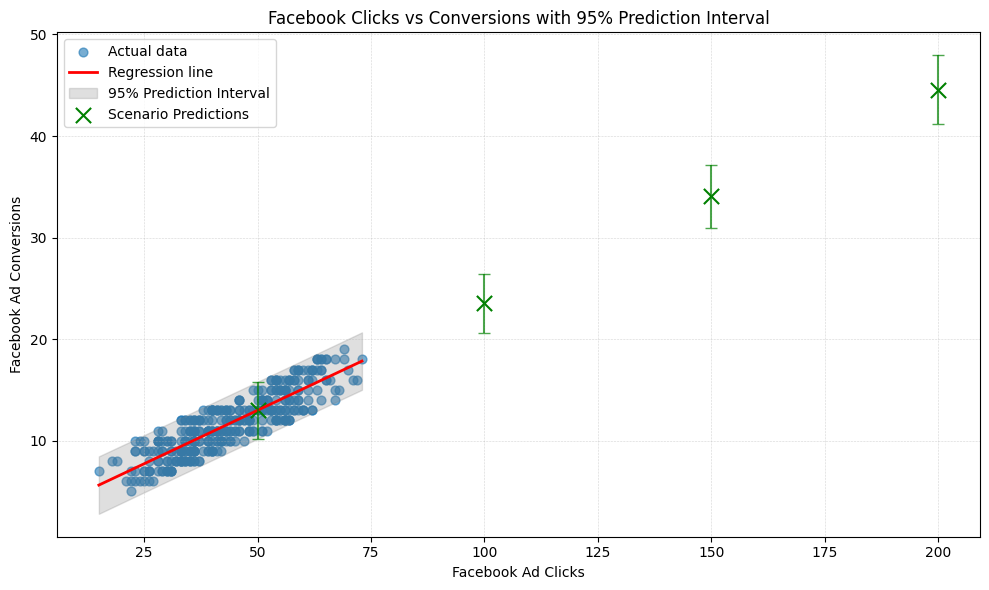


Scenario predictions (with 95% prediction interval):
 Facebook Ad Clicks  pred_mean  pred_obs_ci_lower  pred_obs_ci_upper
                 50      13.00              10.19              15.80
                100      23.52              20.63              26.41
                150      34.05              30.96              37.13
                200      44.57              41.19              47.95


In [21]:
X_col = "Facebook Ad Clicks"
y_col = "Facebook Ad Conversions"

# --- Ensure model exists: fit if necessary ---

X_all = df[[X_col]]
X_all_sm = sm.add_constant(X_all)
y_all = df[y_col]
model_sm = sm.OLS(y_all, X_all_sm).fit()

# --- Create scenario inputs 
click_values = [50, 100, 150, 200]                     
click_scenarios = pd.DataFrame({X_col: click_values})
click_scenarios_sm = sm.add_constant(click_scenarios)

# --- Get scenario predictions with 95% prediction intervals ---
pred_results = model_sm.get_prediction(click_scenarios_sm)
pred_summary = pred_results.summary_frame(alpha=0.05)   # columns include: mean, mean_ci_lower, mean_ci_upper, obs_ci_lower, obs_ci_upper

# --- Prepare plotting range for smooth regression line and PI band ---
x_min = int(df[X_col].min())
x_max = int(df[X_col].max())
x_range = np.arange(x_min, x_max + 1)
x_range_df = pd.DataFrame({X_col: x_range})
x_range_sm = sm.add_constant(x_range_df)

# --- Predictions for full range (for line + PI band) ---
range_preds = model_sm.get_prediction(x_range_sm).summary_frame(alpha=0.05)
y_line = range_preds["mean"].to_numpy()
lower_pi = range_preds["obs_ci_lower"].to_numpy()
upper_pi = range_preds["obs_ci_upper"].to_numpy()

# --- Plot: data, regression line, prediction band, scenario points + errorbars ---
plt.figure(figsize=(10,6))

# Actual data scatter (use underlying series aligned)
plt.scatter(df[X_col], df[y_col], alpha=0.6, label="Actual data", s=40)

# Regression line
plt.plot(x_range, y_line, color="red", linewidth=2, label="Regression line")

# 95% prediction interval (shaded)
plt.fill_between(x_range, lower_pi, upper_pi, color="gray", alpha=0.25, label="95% Prediction Interval")

# Scenario predictions (points) and vertical error bars using obs_ci
scenario_x = click_scenarios[X_col].to_numpy()
scenario_mean = pred_summary["mean"].to_numpy()
scenario_lower = pred_summary["obs_ci_lower"].to_numpy()
scenario_upper = pred_summary["obs_ci_upper"].to_numpy()

plt.scatter(scenario_x, scenario_mean, color="green", marker="x", s=120, label="Scenario Predictions")
plt.errorbar(scenario_x, scenario_mean,
             yerr=[scenario_mean - scenario_lower, scenario_upper - scenario_mean],
             fmt='none', ecolor='green', alpha=0.7, capsize=4)


plt.title("Facebook Clicks vs Conversions with 95% Prediction Interval")
plt.xlabel("Facebook Ad Clicks")
plt.ylabel("Facebook Ad Conversions")
plt.legend()
plt.grid(linestyle=":", linewidth=0.4)
plt.tight_layout()
plt.show()


out = click_scenarios.copy()
out["pred_mean"] = np.round(pred_summary["mean"].to_numpy(), 2)
out["pred_obs_ci_lower"] = np.round(pred_summary["obs_ci_lower"].to_numpy(), 2)
out["pred_obs_ci_upper"] = np.round(pred_summary["obs_ci_upper"].to_numpy(), 2)
print("\nScenario predictions (with 95% prediction interval):")
print(out.to_string(index=False))


## Final Conclusions & Recommendations (improved)

#### Conclusion : Facebook generated significantly more conversions than AdWords in 2019. Conversions increase with clicks (approx. +0.21 conversions per click) and clicks explain ~76% of daily variation. For planning, use prediction intervals rather than point estimates.

#### Actionable Recommendations:

- Reallocate budget toward Facebook for conversion-focused campaigns, while keeping some AdWords spend for awareness.

- Use the regression model for short-term forecasting, but include prediction intervals when setting targets.

- Build a multivariate model (add cost, impressions, CTR) to improve forecast accuracy and narrow prediction intervals.

- Report effect size (Cohen's d) and difference-in-means CI when presenting A/B results to stakeholders.

In [1]:
import sys, shutil
print("Python exe:", sys.executable)
print("Pandoc path seen by this kernel:", shutil.which("pandoc"))


Python exe: C:\Users\sujal\AppData\Local\Programs\Python\Python313\python.exe
Pandoc path seen by this kernel: None


In [2]:
jupyter nbconvert --to html notebook.ipynb


SyntaxError: invalid syntax (3368992921.py, line 1)